<div style="border:solid green 4px; padding: 20px">Hi there! I can clearly see the work you've done on your project, it is the time to review the results. My critical comments are highlighted with <span style='color: red;'>red</span>,  less urgent remarks in <span style='color: #ebd731;'>yellow</span>, recommendations and extra information - in <span style='color: green;'>green</span>.</div>

# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
# import pandas library and dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# have a look at basic information about the data

pd.pandas.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div style="border:solid green 4px; padding: 20px">It is not a big deal at all - I would consider placing your imports and probably also options block to a separate cell/cells. Sometimes you need to reload data from your file/query, there is no need to execute those statements again. Also in a more serious project your cell above might become pretty long and messy.</div>

In [2]:
print(data.info(), '\n')
print('The dataset has',data.shape[0],'rows and',data.shape[1],'columns.', '\n')
print('It appears that there are quite some features that contain missing values, our next task is to make a list of those features.\nThis list will help us in the later analysis.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
# make a list of the variables that contain missing values
vars_with_na = [each for each in data.columns if data[each].isnull().sum()>1]

# print the variable name and the percentage of missing values
for each in vars_with_na:
    print(each, np.round(data[each].isnull().mean()*100, 3),  '% missing values')

ceiling_height 38.799 % missing values
floors_total 0.363 % missing values
living_area 8.03 % missing values
is_apartment 88.291 % missing values
kitchen_area 9.612 % missing values
balcony 48.605 % missing values
locality_name 0.207 % missing values
airports_nearest 23.385 % missing values
cityCenters_nearest 23.288 % missing values
parks_around3000 23.284 % missing values
parks_nearest 65.91 % missing values
ponds_around3000 23.284 % missing values
ponds_nearest 61.56 % missing values
days_exposition 13.423 % missing values


<div style="border:solid green 4px; padding: 20px">Pretty neat, also using list comprehensions are always appreciated!</div>

### Conclusion

After having a first glance of the data, it is found that 'is_apartment' (88.291 %), 'parks_nearest' (65.91 %) and 'ponds_nearest' (61.56 %) have the most missing values comparing with the rest of the features. If this is a learning task (target field provided), then it is uncertain whether these features will be usefull unless feature engineering is heavily involved.

However, since we are currently in EDA phase, we will continue to work with these features and see if we can extract any values from those fields.

### Step 2. Data preprocessing

Question 1: Determine and study the missing values
- A practical replacement can be presumed for some missing values. For example, if the user doesn’t enter the number of balconies, then there probably aren’t any. The correct course of action here is to replace these missing values with 0. There’s no suitable replacement value for other data types. In this case, leave these values blank. A missing value is also a key indicator that mustn’t be hidden.
- Fill in the missing values where appropriate. Explain why you’ve chosen to fill the missing values in these particular columns and how you selected the values.
- Describe the factors that may have led up to the missing values.

In [4]:
# Using the list created previously, we like to know which fields are numerical and which fields are categorical. Then we will
# assign replacement values accordingly.

data[vars_with_na].info()
temp = data[vars_with_na]

# Create a subset that contains all numerical features with missing values

vars_with_na_num = temp.select_dtypes(exclude=['object'])

# Create a subset that contains all categorical features with missing values

vars_with_na_cat = temp[temp.columns.difference(vars_with_na_num.columns)]
del temp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 14 columns):
ceiling_height         14504 non-null float64
floors_total           23613 non-null float64
living_area            21796 non-null float64
is_apartment           2775 non-null object
kitchen_area           21421 non-null float64
balcony                12180 non-null float64
locality_name          23650 non-null object
airports_nearest       18157 non-null float64
cityCenters_nearest    18180 non-null float64
parks_around3000       18181 non-null float64
parks_nearest          8079 non-null float64
ponds_around3000       18181 non-null float64
ponds_nearest          9110 non-null float64
days_exposition        20518 non-null float64
dtypes: float64(12), object(2)
memory usage: 2.5+ MB


In [5]:
# Numerical features with missing values where 0 are allowed (0 can be used for replacement of the missing fields)

for each in ['balcony','parks_around3000','ponds_around3000']:
    vars_with_na_num[each].fillna(0, inplace=True)

print([each for each in ['balcony','parks_around3000','ponds_around3000'] if vars_with_na_num[each].isnull().sum()>0])

# Numerical features with missing values where 0 are not allowed (0 cann't be used for replacement of the missing fields)

for each in ['ceiling_height','floors_total','living_area','kitchen_area','days_exposition']:
    vars_with_na_num[each].fillna(vars_with_na_num[each].median(), inplace=True)
    
print([each for each in ['ceiling_height','floors_total','living_area','kitchen_area','days_exposition'] if vars_with_na_num[each].isnull().sum()>0])

# Numerical features needs to be preprocessed in conjunction with other numerical features

vars_with_na_num.loc[vars_with_na_num['parks_around3000']==0, 'parks_nearest'] = 9999
vars_with_na_num.loc[vars_with_na_num['ponds_around3000']==0, 'ponds_nearest'] = 9999
vars_with_na_num.loc[vars_with_na_num['airports_nearest'].isnull(), 'cityCenters_nearest'] = 9999
vars_with_na_num.loc[vars_with_na_num['cityCenters_nearest']==9999, 'airports_nearest'] = 9999

print([each for each in ['parks_nearest','ponds_nearest','airports_nearest','cityCenters_nearest'] if vars_with_na_num[each].isnull().sum()>0])

[]
[]
['cityCenters_nearest']


In [6]:
# We found an exception

print(len(vars_with_na_num.loc[vars_with_na_num['cityCenters_nearest'].isnull(), 'cityCenters_nearest']))
vars_with_na_num.loc[vars_with_na_num['cityCenters_nearest'].isnull(), 'cityCenters_nearest'] = 9999
print([each for each in ['parks_nearest','ponds_nearest','airports_nearest','cityCenters_nearest'] if vars_with_na_num[each].isnull().sum()>0])

1
[]


<div style="border:solid green 4px; padding: 20px">Good job at checking the result of your statements and finding exceptions.</div>

In [7]:
# Categorical features with missing values where 'Unknow' value is acceptable

vars_with_na_cat[vars_with_na_cat['is_apartment'].isnull()] = 'Unknown'

# Since there is a translation issue (locality_name), I will scrap this column altogether for now. This will be done later

In [8]:
# Combine dataset

temp = vars_with_na_num.join(vars_with_na_cat)
vars_without_na = data[data.columns.difference(temp.columns)]

# new dataset with preprocessed variables

data_new = vars_without_na.join(temp)
data_new.drop(['locality_name'], axis=1, inplace=True)
del temp, vars_without_na

Summary:
- First, identify variables with missing values, then further divide these variables into two subgroups. One is a group of numerical variables that have missing values, the other group only contains categorical variables that have missing values.
- Second, based on certain assumptions made, there are three types of numerical features within the numeric group to which We will apply different treatments to.
    - Numerical features with missing values where 0 are allowed (1)
    - Numerical features with missing values where 0 are not allowed (2)
    - Numerical features needs to be preprocessed in conjunction with other numerical features (3)
- Third, apply treatment to the group of categorical features that contain missing values.
- Fourth, combine the two group of features, which now are fully processed, into one dataframe.


Answer 1:
- 'balcony','parks_around3000','ponds_around3000' belongs to (1). Here, a house/apartment may or may not has a balcony; there may or may not any parks within 3000 meters; and there may or may not be any ponds nearby. Therefore, it's decided that 0 will be used to fill in missing values from those three features.
- 'ceiling_height','floors_total','living_area','kitchen_area','days_exposition' belongs to (2). These numeric features are hard statistics that a house/apartment would require in order to meet satisfying cretieria to put on the market. Therefore, 0 is not allowed to be used in these features because 0 kitchens, or living room just don't make any sense. We will use the median value from each feature to fill in the NA's.
- 'parks_nearest','ponds_nearest','airports_nearest','cityCenters_nearest' belongs to (3). These are all distance features. ponds_nearest and parks_nearest require special attention because they heavily rely on parks_around3000 and ponds_around3000. In other words, if there are missing fields in the park and pond indicator columns then their corresponding distance column will also have missing values. Also note that filling with 0 in distance columns will introduce misleading information to the data, so the strategy here is to put 9999 to the distance fields whenever the indicator columns has a missing values. 9999 is a placeholder that we use to represent long distance. 
- For 'airports_nearest' and 'cityCenters_nearest', I made an assumption that if a house/apartment is not close by any airports then chances are it is not near any city centers. I used this condition to fill in the missing values (9999 being used to indicate long distance), and it worked suprisingly well except for one observation where this house/apt has an airport nearby but does not has any city center near by. So I manually put 9999 for that one record. 
- For the categorical features that having missing values, 'is_apartment' and 'locality_name', I used 'Unknown' to replace the missing values within 'is_apartment' feature. I felt this feature could be converted to a boolean variable but since it presents too many missing values originally (88%), I decided to keep this variable as categorical instead.
- There could be various reasons that these columns contain missing values. For the distance columns, it is easy to suspect that the NA's are due to the lack of data in their corresponding indicator columns if they have one. For the hard statistics feature such as kitchen_area, missing values are included potentionally due to the lack of data quality check during ETL or poor data mapping when joining multiple tables pulled from multiple databases.  

<div style="border:solid #ebd731; 4px; padding: 20px">Well, filling with 9999 differs from the situation where we fill with just 0 only by the fact that instead of artificially siezing the distance from missing records to ponds, city-center and other we are actually placing them on a single remote distance. But by what means it is a better scenario? I would think about a standard replace with any kind of average here.</div>

Question 2: Convert the data to the required types
- Indicate the columns where the data types have to be changed and explain why.

In [9]:
data_new.info()
data_new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 21 columns):
first_day_exposition    23699 non-null object
floor                   23699 non-null int64
last_price              23699 non-null float64
open_plan               23699 non-null bool
rooms                   23699 non-null int64
studio                  23699 non-null bool
total_area              23699 non-null float64
total_images            23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around3000        23699 non-null float64
ponds_nearest           23699 non-null float64
days_exposi

,first_day_exposition,floor,last_price,open_plan,rooms,studio,total_area,total_images,ceiling_height,floors_total,living_area,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_apartment
0,2019-03-07T00:00:00,8,13000000.0,False,3,False,108.00,20,2.70,16.0,51.0,25.00,0.0,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,Unknown
1,2018-12-04T00:00:00,1,3350000.0,False,1,False,40.40,7,2.65,11.0,18.6,11.00,2.0,12817.0,18603.0,0.0,9999.0,0.0,9999.0,81.0,Unknown
2,2015-08-20T00:00:00,4,5196000.0,False,2,False,56.00,10,2.65,5.0,34.3,8.30,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Unknown
3,2015-07-24T00:00:00,9,64900000.0,False,3,False,159.00,0,2.65,14.0,30.0,9.10,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Unknown
4,2018-06-19T00:00:00,13,10000000.0,False,2,False,100.00,2,3.03,14.0,32.0,41.00,0.0,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,2017-03-21T00:00:00,3,9700000.0,False,3,False,133.81,9,3.70,5.0,73.3,13.83,0.0,24665.0,4232.0,1.0,796.0,3.0,381.0,95.0,Unknown
23695,2018-01-15T00:00:00,4,3100000.0,False,3,False,59.00,14,2.65,5.0,38.0,8.50,0.0,9999.0,9999.0,0.0,9999.0,0.0,9999.0,45.0,Unknown
23696,2018-02-11T00:00:00,1,2500000.0,False,2,False,56.70,18,2.65,3.0,29.7,9.10,0.0,9999.0,9999.0,0.0,9999.0,0.0,9999.0,95.0,Unknown
23697,2017-03-28T00:00:00,12,11475000.0,False,2,False,76.75,13,3.00,17.0,30.0,23.30,2.0,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,Unknown


In [10]:
# Convert an object to a date column

data_new['first_day_exposition'] = pd.to_datetime(data_new['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

<div style="border:solid #ebd731; 4px; padding: 20px">I suppose we don't need hour, minute and second values in our project.</div>

Answer 2:
- I converted the 'first_day_exposition' column to date as it previously mislabeled as an object.

### Step 3. Make calculations and add them to the table

Question 3: Calculate the following
- The price per square meter
- The day of the week, month, and year that the ad was published
- Which floor the apartment is on (first, last, or other)
- The ratio between the living space and the total area, as well as between the kitchen space and the total area.

In [11]:
# The price per square meter

data_new['price_per_area'] = data_new['last_price'] / data_new['total_area']

# The day of the week, month, and year that the ad as published

data_new['weekday'] = pd.DatetimeIndex(data_new['first_day_exposition']).weekday
data_new['month'] = pd.DatetimeIndex(data_new['first_day_exposition']).month
data_new['year'] = pd.DatetimeIndex(data_new['first_day_exposition']).year

# Which floor

data_new.loc[(data_new.floor == 1),  'floor_group'] = 'first'
data_new.loc[(data_new.floor == data_new.floors_total),  'floor_group'] = 'last'
data_new['floor_group'].fillna('other', inplace=True)

# The ratio between living space and the total area

data_new['living_area_ratio'] = data_new['living_area'] / data_new['total_area']

# The ratio between kitchen space and total area

data_new['kitchen_area_ratio'] = data_new['kitchen_area'] / data_new['total_area']

<div style="border:solid green 4px; padding: 20px">It is a mere pleasure to manipulate your pandas series objects in such an easy way, isn't it?</div>

In [12]:
data_new

,first_day_exposition,floor,last_price,open_plan,rooms,studio,total_area,total_images,ceiling_height,floors_total,living_area,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_apartment,price_per_area,weekday,month,year,floor_group,living_area_ratio,kitchen_area_ratio
0,2019-03-07,8,13000000.0,False,3,False,108.00,20,2.70,16.0,51.0,25.00,0.0,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,Unknown,120370.370370,3,3,2019,other,0.472222,0.231481
1,2018-12-04,1,3350000.0,False,1,False,40.40,7,2.65,11.0,18.6,11.00,2.0,12817.0,18603.0,0.0,9999.0,0.0,9999.0,81.0,Unknown,82920.792079,1,12,2018,first,0.460396,0.272277
2,2015-08-20,4,5196000.0,False,2,False,56.00,10,2.65,5.0,34.3,8.30,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Unknown,92785.714286,3,8,2015,other,0.612500,0.148214
3,2015-07-24,9,64900000.0,False,3,False,159.00,0,2.65,14.0,30.0,9.10,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Unknown,408176.100629,4,7,2015,other,0.188679,0.057233
4,2018-06-19,13,10000000.0,False,2,False,100.00,2,3.03,14.0,32.0,41.00,0.0,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Unknown,100000.000000,1,6,2018,other,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,2017-03-21,3,9700000.0,False,3,False,133.81,9,3.70,5.0,73.3,13.83,0.0,24665.0,4232.0,1.0,796.0,3.0,381.0,95.0,Unknown,72490.845228,1,3,2017,other,0.547792,0.103356
23695,2018-01-15,4,3100000.0,False,3,False,59.00,14,2.65,5.0,38.0,8.50,0.0,9999.0,9999.0,0.0,9999.0,0.0,9999.0,45.0,Unknown,52542.372881,0,1,2018,other,0.644068,0.144068
23696,2018-02-11,1,2500000.0,False,2,False,56.70,18,2.65,3.0,29.7,9.10,0.0,9999.0,9999.0,0.0,9999.0,0.0,9999.0,95.0,Unknown,44091.710758,6,2,2018,first,0.523810,0.160494
23697,2017-03-28,12,11475000.0,False,2,False,76.75,13,3.00,17.0,30.0,23.30,2.0,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,Unknown,149511.400651,1,3,2017,other,0.390879,0.303583


### Step 4. Conduct exploratory data analysis and follow the instructions below:

Question 4: Carefully investigate the following parameters: square area, price, number of rooms, and ceiling height. Plot a histogram for each parameter.

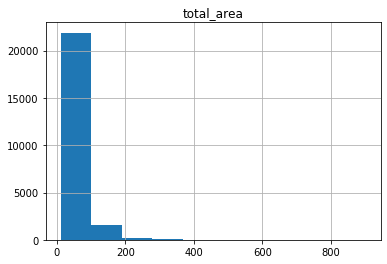

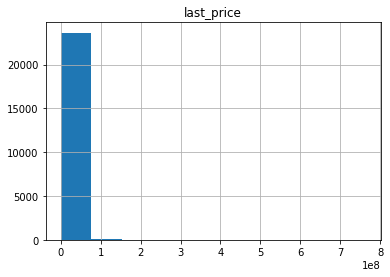

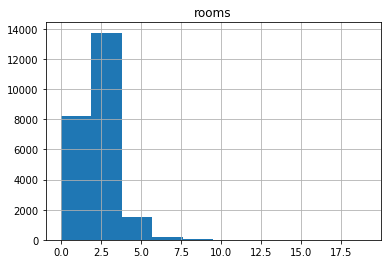

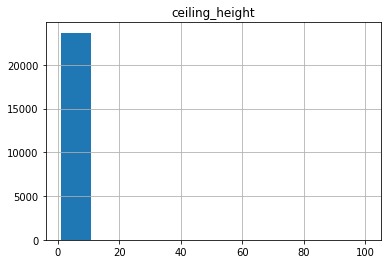

In [13]:
for each in ['total_area','last_price','rooms','ceiling_height']:
    data_new[each].hist()
    plt.title(each)
    plt.show()

<div style="border:solid #ebd731; 4px; padding: 20px">You might want to change range and bins arguments there to make your plots show more information. It might obliterate the need in a for loop, unfortunately.</div>

Question 5: Examine the time it's taken to sell the apartment and plot a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered to have happened rather quickly or taken an extra long time?

The mean time it took to sell is 169.0 days
The median time it took to sell is 95.0 days


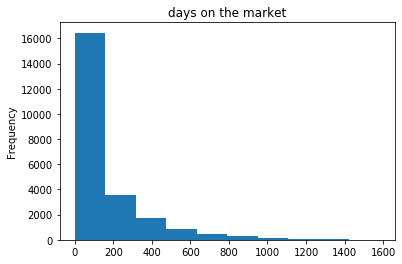

In [14]:
data_new['days_exposition'].plot(kind='hist', title='days on the market')
print('The mean time it took to sell is', round(data_new['days_exposition'].mean(), 0),'days')
print('The median time it took to sell is', round(data_new['days_exposition'].median(), 0),'days')

The upperbound for the selling time is 430.0 days. 

There are 2324 records that are considered as rare cases in terms of selling duration. 

If a property is sold within 45.0 days, then it is considered as a quick sell.


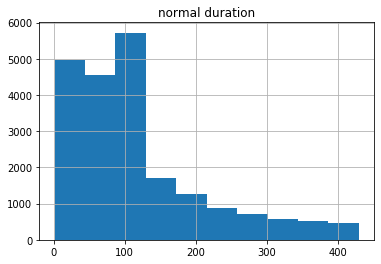

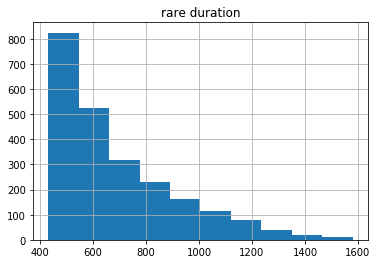

In [15]:
# detect normal range of days on market

def detect_outliers(column):
    sorted(column)
    Q1, Q3 = np.percentile(column, [25,75])
    IQR = Q3 - Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    return lower, upper

lowerbound, upperbound = detect_outliers(data_new.days_exposition)

# Group the data into rare cases and normal cases

data_new_normal = data_new[data_new.days_exposition <= upperbound]
data_new_outlier = data_new[data_new.days_exposition > upperbound]

print('The upperbound for selling time is', upperbound, 'days.','\n')
print('There are', len(data_new_outlier), 'records that are considered as rare cases in terms of selling time.','\n')
print('If a property is sold within', round(data_new_normal.days_exposition.describe()['25%'],0), 'days, then it is considered as a quick sell.')

# Take a look at the distribution again

data_new_normal.days_exposition.hist()
plt.title('normal duration')
plt.show()
data_new_outlier.days_exposition.hist()
plt.title('rare duration')
plt.show()

<div style="border:solid #ebd731; 4px; padding: 20px">There is need to sort the column explicitly using np.percentile.</div>

Summary:
- We need to establish an upper and lower bound for 'days on the market' metric. Any value (in days) that is greater than the upper bound is considered as experiencing long sell. Any value (in days) that is less than the lower bound is considered as a quick sell. 
- Since we are dealing with a Poisson distribution, and all values will be positive here, we need to find an alternative for the lower bound value. Our original lower bound is a negative value which does not make sense in our given context. 
- A function is created to calculate the original upper and lower bound. The population who has 'days on market' greater than this upper bound is considered as outliers. All people from this population are considered having a long time to sell. 
- The rest of the population, other than the outliers, is considered as people who experience normal time to sell. Within this normal population, we use the 25th percentile in 'days on market' to be our new lower bound and anyone who have lower value than this lower bound is considered as having a quick sell.

Answer 5:
- When choosing the appropriate metric to describe the average time it usually takes to complete a sale, there are normally two options. We can either use the mean of the median. After calculating the IQR of the selling duration, it is found that there are more than 2000 records that experienced rare selling durations and that will have an impact on our mean duration. Therefore, to describe the average time to sell a property, I would use the median (95 days) selling duration. 
- If a property is sold in 430 days, then it is considered as having an extra long time to sell. If a property is sold within 45 days, then it is considered as a quick sell.

<div style="border:solid green 4px; padding: 20px">I appreciate your logical flow and the way you defined outliers and extreme values.</div>

Question 6: Remove rare and outlying values and describe the patterns you've discovered.

Answer 6: After inspecting the graph for the normal cases, it is observed that the majority of people experience about 3 month (95 days) of time until their property is sold.

Question 7: Which factors have had the biggest influence on an apartment’s price? Examine whether the value depends on the total square area, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the publication date: day of the week, month, and year.

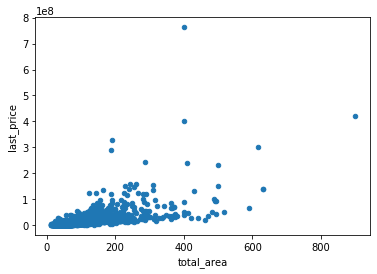

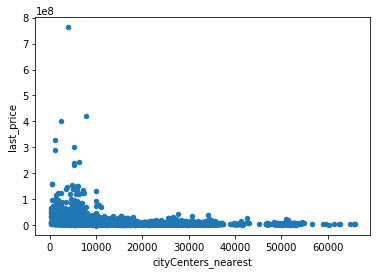

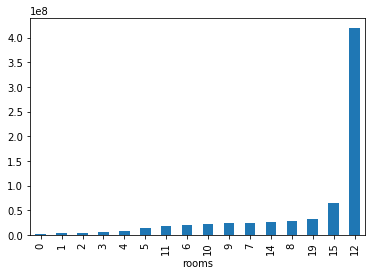

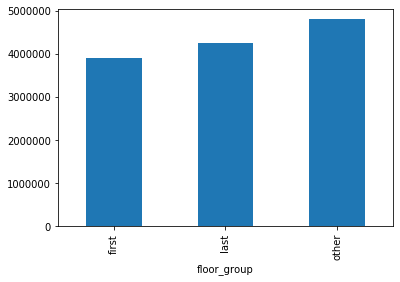

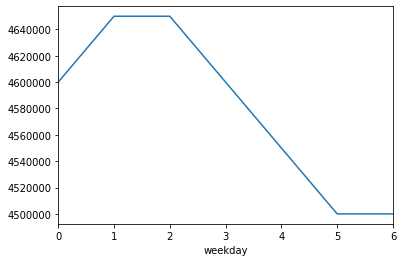

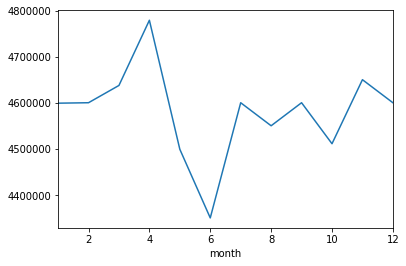

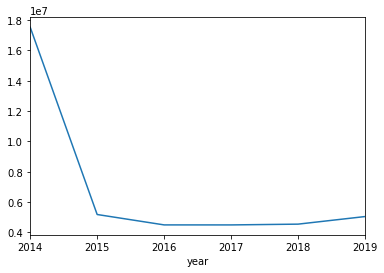

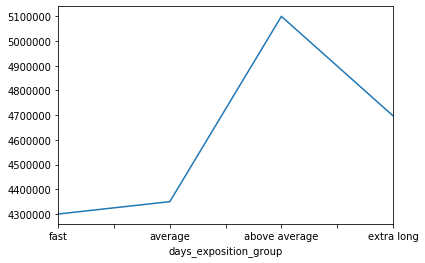

In [16]:
# Continous

for each in ['total_area','cityCenters_nearest']:
    data_new_normal.plot(x=each, y='last_price', kind='scatter')
    plt.show()

# Discrete and categorical

for each in ['rooms','floor_group']:
    data_new_normal.groupby(each)['last_price'].median().sort_values().plot.bar()
    plt.show()

# Temporal

for each in ['weekday','month','year']:
    data_new_normal.groupby(each)['last_price'].median().plot()
    plt.show()

pd.options.mode.chained_assignment = None
bins= [1, 45, 95, 147, 430]
labels = ['fast','average','above average','extra long']
data_new_normal['days_exposition_group'] = pd.cut(data_new_normal['days_exposition'], bins=bins, labels=labels, right=False)
data_new_normal.groupby('days_exposition_group')['last_price'].median().plot.bar()

<div style="border:solid green 4px; padding: 20px">Nice one. The last plot is naturally meant to be a barchart, although your x-axis has some kind of order in it, it is still a discrete text value.</div>

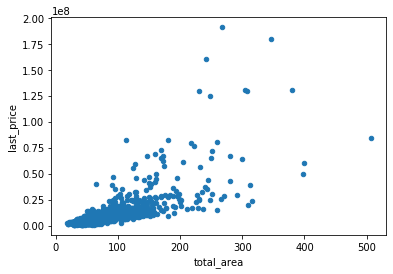

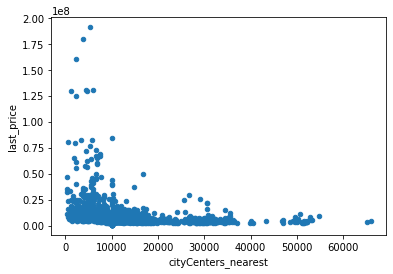

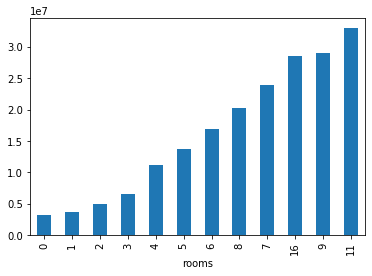

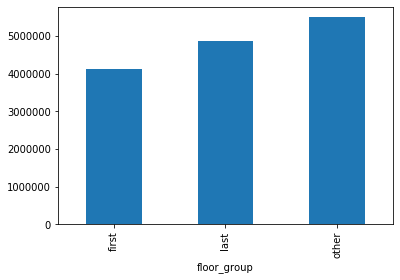

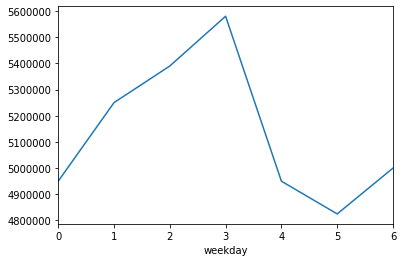

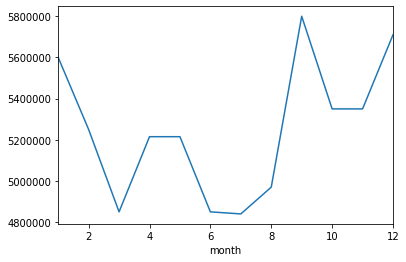

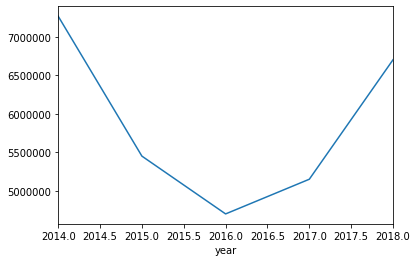

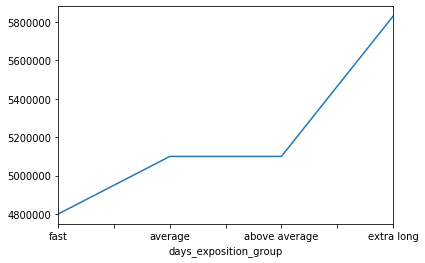

In [17]:
# Same process but for the outlier population

for each in ['total_area','cityCenters_nearest']:
    data_new_outlier.plot(x=each, y='last_price', kind='scatter')
    plt.show()

for each in ['rooms','floor_group']:
    data_new_outlier.groupby(each)['last_price'].median().sort_values().plot.bar()
    plt.show()

for each in ['weekday','month','year']:
    data_new_outlier.groupby(each)['last_price'].median().plot()
    plt.show()

pd.options.mode.chained_assignment = None
bins= [431, 501, 609, 806, 1580]
labels = ['fast','average','above average','extra long']
data_new_outlier['days_exposition_group'] = pd.cut(data_new_outlier['days_exposition'], bins=bins, labels=labels, right=False)
data_new_outlier.groupby('days_exposition_group')['last_price'].median().plot.bar()

Summary:
- We will apply mutiple visualization methods to the normal population and outlier population seperately. Please note that starting from this step, median selling price will be used to replace the average selling price when describing. This is because the mean always tends to be riht-skewed due to rare cases.  
- For categorical and discrete variables, I used the median price to describe how high or low the selling price is for each category level.
- For convenience, I created a new variables that's basically categorized data based on the 'days_exposition' field.

Answer 7:
- For the normal population,
    - there is a slight positive correlation between total area and selling price;
    - the selling price tends to be higher if the distance from downtown is short;
    - the more rooms a property has, the more expensive it gets;
    - there is a negative impact on selling prices if the property is located on either the first or last floor;
    - median selling price is higher on Monday and Tuesday;
    - median selling price is higher around April;
    - median selling price has not gone up much after 2014;
    - median selling price is higher if the property undergoes above average time to sell.
- For the outlier population,
    - there is a mild positive correlation between total area and selling price;
    - the selling price tends to be higher if the distance from downtown is short;
    - the more rooms a property has, the more expensive it gets;
    - there is a negative impact on selling prices if the property is located on either the first or last floor;
    - median selling price is higher on Wednesday;
    - median selling price is higher during winter months;
    - median selling price has gone up since 2016;
    - the longer a property go throught to sell, the higher the median selling price tends to be.

Question 8: Select the 10 localities with the largest number of ads then calculate the average price per square meter in these localities. Determine which ones have the highest and lowest housing prices. You can find this data by name in the ’locality_name’ column.

In [18]:
# Well, looks like I need to append the 'locality_name' back to the dataframe currently in use

data_new['locality_name'] = data['locality_name']

# Create a pivot table according to 'locality_name' 
# Note that groupby with aggregation will also work here

temp = data_new.pivot_table(index='locality_name', values='price_per_area', aggfunc=['count','median'])
temp.columns = ['number_ads', 'median_price_per_area']
temp.sort_values('number_ads', ascending=False, inplace=True)
temp.reset_index(level=0, inplace=True)
temp = temp[:10]
temp

,locality_name,number_ads,median_price_per_area
0,Санкт-Петербург,15721,104761.904762
1,посёлок Мурино,522,85878.462169
2,посёлок Шушары,440,76876.172608
3,Всеволожск,398,65789.473684
4,Пушкин,369,100000.000000
5,Колпино,338,74723.748474
6,посёлок Парголово,327,91642.857143
7,Гатчина,307,67796.610169
8,деревня Кудрово,299,91860.465116
9,Выборг,237,58158.319871


Answer 8: 'Санкт-Петербург' is the city where has most number of ads displayed. It also has the highest price per square meter among other top 10 cities. 'Выборг' has the lowest price per square meter among the top 10 cities.

Question 9: Thoroughly look at apartment offers
- Each apartment has information about the distance to the city center. Select apartments in Saint Petersburg (‘locality_name’). 
- Your task is to pinpoint which area is considered to be downtown. In order to do that, create a column with the distance to the city center in km and round to the nearest whole number. 
- Next, calculate the average price for each kilometer and plot a graph to display how prices are affected by the distance to the city center. 
- Find a place on the graph where it shifts significantly. That's the downtown border.

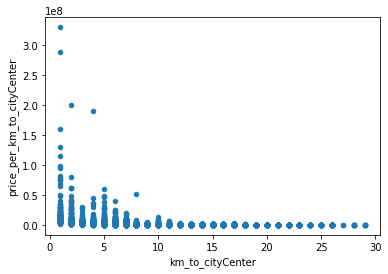

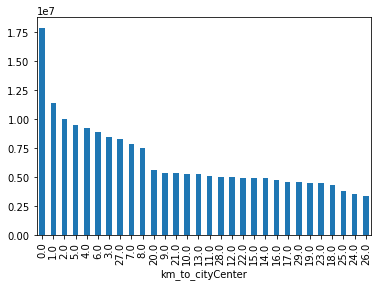

In [19]:
del temp
top_city = data_new.query('locality_name == "Санкт-Петербург"')
top_city['km_to_cityCenter'] = top_city['cityCenters_nearest']/1000
top_city['km_to_cityCenter'] = top_city['km_to_cityCenter'].round(0)
top_city['price_per_km_to_cityCenter'] = top_city['last_price'] / top_city['km_to_cityCenter']

# Both graphs will answer the question, but perhaps the second one has more granular details

top_city.plot.scatter(x='km_to_cityCenter', y='price_per_km_to_cityCenter')
plt.show()
top_city.groupby('km_to_cityCenter')['last_price'].median().sort_values(ascending=False).plot.bar()
plt.show()

<div style="border:solid green 4px; padding: 20px">It is hard to detect the density of points on a scatter plot in our case, so it is great you also made a barchart.</div>

Answer 9: The downtown border appears to be 8kms from the city center of Saint Petersburg. It's also observed that the selling price per distance from city center tends to drop quite a lot starting near that border line.

Question 10: 
- Select all the apartments in the downtown and examine correlations between the following parameters: total area, price, number of rooms, ceiling height. 
- Also identify the factors that affect an apartment’s price: number of rooms, floor, distance to the downtown area, and ad publication date. Draw your conclusions. 
- Are they different from the overall deductions about the entire city?

                total_area  last_price     rooms  ceiling_height
total_area        1.000000    0.637174  0.745798        0.031514
last_price        0.637174    1.000000  0.338373        0.026917
rooms             0.745798    0.338373  1.000000        0.021168
ceiling_height    0.031514    0.026917  0.021168        1.000000 

                total_area  last_price     rooms  ceiling_height
total_area        1.000000    0.819686  0.739857        0.073460
last_price        0.819686    1.000000  0.486868        0.085695
rooms             0.739857    0.486868  1.000000        0.020326
ceiling_height    0.073460    0.085695  0.020326        1.000000


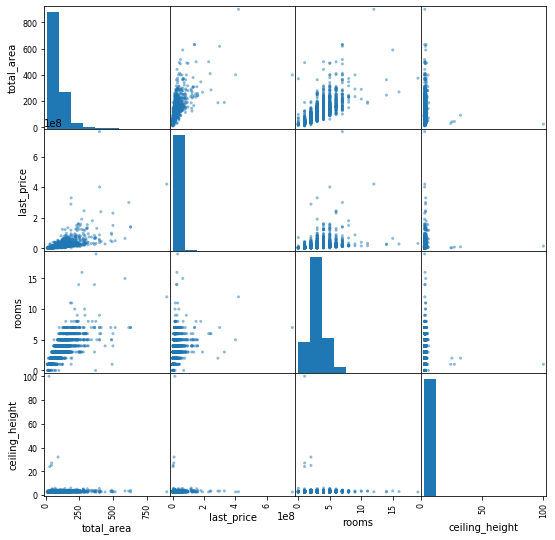

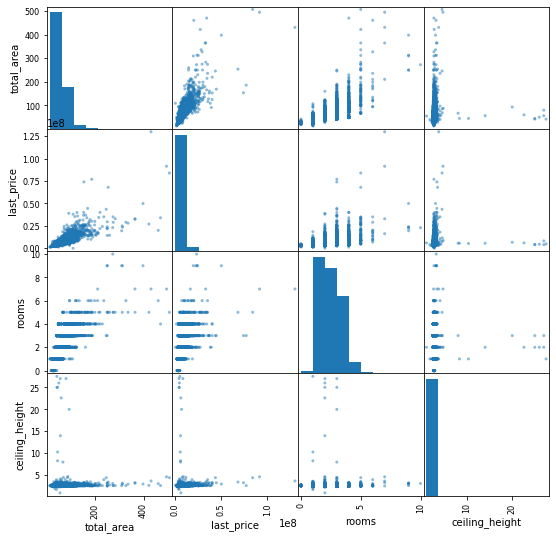

In [20]:
downtown = top_city.query('km_to_cityCenter <= 8.0')
rural = top_city.query('km_to_cityCenter > 8.0')

# Determine correlations for downtown and rural areas

pd.plotting.scatter_matrix(downtown[['total_area','last_price','rooms','ceiling_height']], figsize=(9,9))
pd.plotting.scatter_matrix(rural[['total_area','last_price','rooms','ceiling_height']], figsize=(9,9))

print(downtown[['total_area','last_price','rooms','ceiling_height']].corr(), '\n')
print(rural[['total_area','last_price','rooms','ceiling_height']].corr())

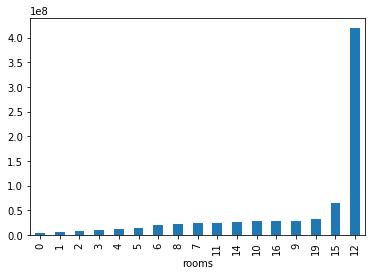

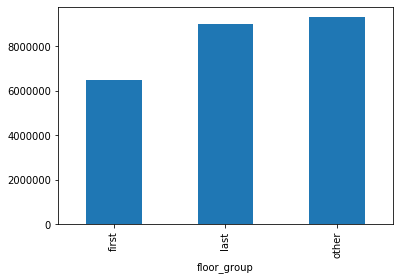

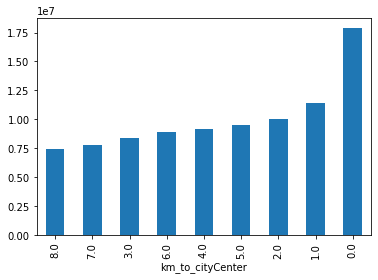

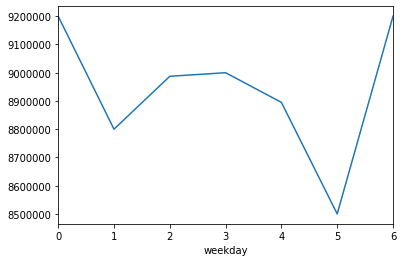

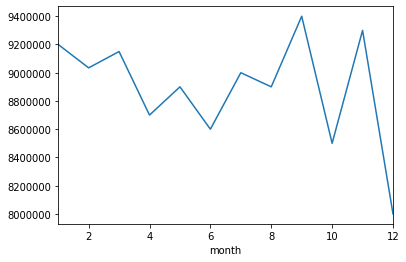

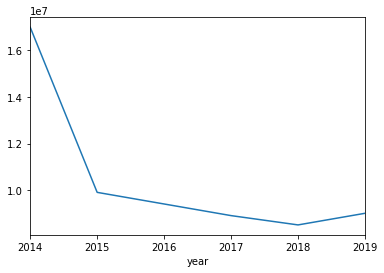

In [21]:
# Determine factors for downtown areas only

for each in ['rooms', 'floor_group', 'km_to_cityCenter']:         
    downtown.groupby(each)['last_price'].median().sort_values().plot.bar()
    plt.show()

for each in ['weekday', 'month', 'year']:
    downtown.groupby(each)['last_price'].median().plot()
    plt.show()

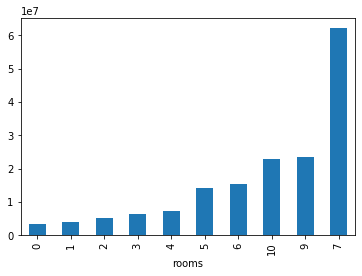

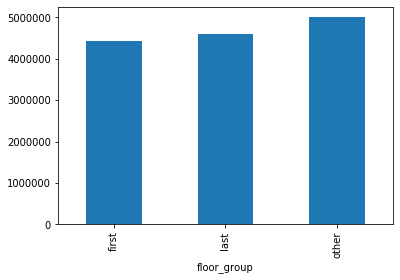

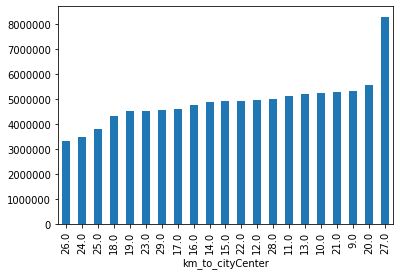

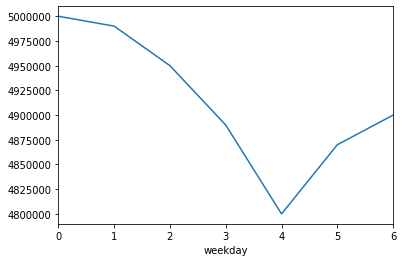

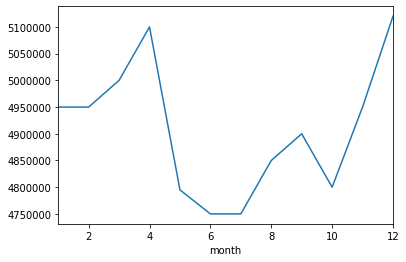

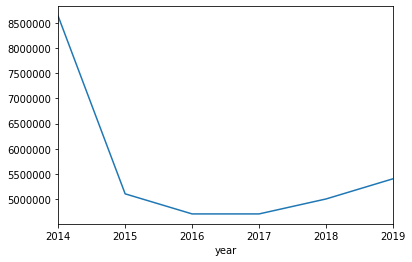

In [23]:
# Determine factors for rural areas only

for each in ['rooms', 'floor_group', 'km_to_cityCenter']:         
    rural.groupby(each)['last_price'].median().sort_values().plot.bar()
    plt.show()

for each in ['weekday', 'month', 'year']:
    rural.groupby(each)['last_price'].median().plot()
    plt.show()

Summary:
- To answer this question, apartments in downtown Saint Petersburg (8km radius) is seperated out from the dataset. The rest of the properties located outside of the 8km circle are considered to be in rural area. Then, correlation and potential factors are calculated seperately for these two area. 
- To examine correlation, a scatter plot matrix is being used. Bar (for discrete and categorical variables) and line (for temporal variables) graph are being used to examine factors that have an impact on selling price.

Answer 10:
- For properties near downtown Saint Pertersburg,
    - strong positive correlation between total area and rooms;
    - medium positive correlation between total area and selling price;
    - proximity to city center, and being on the first floor are two big factors to selling price;
    - having more rooms does not affect selling price, unless having 10+ rooms (an apartment building);
    - selling price is higher if sold during weekends and during fall time (around September).
- For properties in rural ares,
    - strong positive correlation between total area and rooms;
    - strong positive correlation between total area and selling price;
    - slight positive correlation between rooms and selling price;
    - selling price has gone up during recent years (from 2017 to 2019);
    - selling price is higher if sold on early weekdays (from Sunday to Tuesday) and during winter times (from December to April);
    - if a property has less than 5 rooms then the selling price tends to be stable, otherwise the price will go up significantly;
    - being on the first floor does not have an impact on selling prices, and the close a property is from downtown border the more expensice it gets.

### Step 5. Overall conclusion

Key Findings:
- An property could expect to undergoes 95 days to sell. If it is sold within the first 45 days, then it is a quick sell, if it went through more than 430 days, then it's considered to have long time to sell.
- Location does play the most important role here in terms of having an impact on selling price. Taking Saint Petersburg as an example, if a property is located within 8km radius from the city center then the impact of other characteristics such as number of rooms and total area, etc. are limited. 
- If a property is in the downtown area and it is located on the first floor, then the price is relatively lower due to potential noise concerns a buyer may have. 
- If a property has a large total area, chances are it probably has more rooms and the impact of that feature is even enlarged if this property is near downtown area. 
- If a property locates outside of the city border, then the selling price is more related to property's core characteristics such as area, and number of rooms. In other words, distance to city is not a main concern since the property is already in rural area in the first place. 
- Properties near downtown tends to sell well during weekends. This is understandable since more tours will be hosted during weekends. The selling price in downtown area is rather stable in recent years and this has to do with potential slow down of economic activities. 
- Properties in rural areas tends to sell well before Summer time. One potential reason could be that families are less willing to move if it is approaching to school seasons. The selling price in rural area has gone up since 2017.

<div style="border:solid green 4px; padding: 20px">Things I liked about your work - it is tidy and thoughtful. Although I made some amount of commentary in it, it is negligible, your work satisfies the criteria of a well done project. Keep moving in the same direction. Good luck.</div>

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: the price per square meter
- [x]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [x]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [x]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [x]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [x]  histograms for each parameter created
- [x]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [x]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [x]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square foot in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [x]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [x]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn